In [3]:
import keras
from keras.layers import Concatenate, Add, Average, Input, Dense, Flatten, BatchNormalization, Activation, LeakyReLU
from keras.layers.convolutional import Convolution2D, MaxPooling2D, UpSampling2D, Convolution2DTranspose
import matplotlib.pyplot as plt
from keras.models import Model
import keras.optimizers as optimizers
from keras import backend as K
import tensorflow as tf
import numpy as np
import glob
import cv2

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd /content/drive/My\ Drive/FML

/content/drive/My Drive/FML


In [7]:
!unzip /content/drive/My\ Drive/FML/res_char.zip > /dev/null

replace res_char/test/100007.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
def PSNR(y_pred, y_true):
    return 48.1308036087 - (10. * K.log(K.mean(K.square(y_pred - y_true))) / K.log(10.))


In [20]:
x = glob.glob('/content/drive/MyDrive/FML/res12/train/*.jpg') 
val = glob.glob('/content/drive/MyDrive/FML/res12/val/*.jpg')

# Creating training dataset with image size 320x320
x_train = np.zeros((len(x), 320, 320, 3))
y_train = np.zeros((len(x), 320, 320, 3))
count = 0
for i in x:
  img1 = cv2.imread(i)
  img1_name = i.split('/')[-1]
  img2 = cv2.imread('/content/drive/MyDrive/FML/train/' + img1_name)
  img1 = cv2.resize(img1, (320, 320), interpolation = cv2.INTER_NEAREST)
  img2 = cv2.resize(img2, (320, 320), interpolation = cv2.INTER_NEAREST)
  x_train[count] = img1
  y_train[count] = img2
  count += 1

# Creating validation set with image size 320x320
x_val = np.zeros((len(val), 320, 320, 3))
y_val = np.zeros((len(val), 320, 320, 3))
count = 0
for i in val:
  img1 = cv2.imread(i)
  img1_name = i.split('/')[-1]
  img2 = cv2.imread('/content/drive/MyDrive/FML/val/' + img1_name)
  img1 = cv2.resize(img1, (320, 320), interpolation = cv2.INTER_NEAREST)
  img2 = cv2.resize(img2, (320, 320), interpolation = cv2.INTER_NEAREST)
  x_val[count] = img1
  y_val[count] = img2
  count += 1

RedNet 10 with skip **connections**


In [21]:
# Defining the architecture of REDNet-10
init = Input(shape = (320, 320, 3))
level1_1 = Convolution2D(64, (3, 3), padding = 'same', activation = 'relu')(init)
level2_1 = Convolution2D(64, (3, 3), padding = 'same', activation = 'relu')(level1_1)
level3_1 = Convolution2D(64, (3, 3), padding = 'same', activation = 'relu')(level2_1)
level4_1 = Convolution2D(64, (3, 3), padding = 'same', activation = 'relu')(level3_1)
level5_1 = Convolution2D(64, (3, 3), padding = 'same', activation = 'relu')(level4_1)

level5_2 = Convolution2DTranspose(64, (3, 3), padding = 'same', activation = 'relu')(level5_1)
level5 = Add()([level5_1, level5_2])

level4_2 = Convolution2DTranspose(64, (3, 3), padding = 'same', activation = 'relu')(level5)
level4 = Add()([level4_1, level4_2])

level3_2 = Convolution2DTranspose(64, (3, 3), padding = 'same', activation = 'relu')(level4)
level3 = Add()([level3_1, level3_2])

level2_2 = Convolution2DTranspose(64, (3, 3), padding = 'same', activation = 'relu')(level3)
level2 = Add()([level2_1, level2_2])

level1_2 = Convolution2DTranspose(64, (3, 3), padding = 'same', activation = 'relu')(level2)
level1 = Add()([level1_1, level1_2])

decoded = Convolution2D(3, (3, 3), activation = 'linear', padding = 'same')(level1)

# Initiating the model REDNet-10
rednet10 = Model(init, decoded)
adam = tf.keras.optimizers.Adam(learning_rate=1e-4)
rednet10.compile(optimizer='adam', loss='mse', metrics = [PSNR])

In [ ]:
# Defining the architecture of REDNet-10
init = Input(shape = (320, 320, 3))
level1_1 = Convolution2D(64, (5, 5), padding = 'same', activation = 'relu')(init)
level2_1 = Convolution2D(64, (5, 5), padding = 'same', activation = 'relu')(level1_1)
level3_1 = Convolution2D(64, (5, 5), padding = 'same', activation = 'relu')(level2_1)
level4_1 = Convolution2D(64, (5, 5), padding = 'same', activation = 'relu')(level3_1)
level5_1 = Convolution2D(64, (5, 5), padding = 'same', activation = 'relu')(level4_1)

level5_2 = Convolution2DTranspose(64, (5, 5), padding = 'same', activation = 'relu')(level5_1)
level5 = Add()([level5_1, level5_2])

level4_2 = Convolution2DTranspose(64, (5, 5), padding = 'same', activation = 'relu')(level5)
level4 = Add()([level4_1, level4_2])

level3_2 = Convolution2DTranspose(64, (5, 5), padding = 'same', activation = 'relu')(level4)
level3 = Add()([level3_1, level3_2])

level2_2 = Convolution2DTranspose(64, (5, 5), padding = 'same', activation = 'relu')(level3)
level2 = Add()([level2_1, level2_2])

level1_2 = Convolution2DTranspose(64, (5, 5), padding = 'same', activation = 'relu')(level2)
level1 = Add()([level1_1, level1_2])

decoded = Convolution2D(3, (5, 5), activation = 'linear', padding = 'same')(level1)

# Initiating the model REDNet-10
rednet10_5 = Model(init, decoded)
adam = tf.keras.optimizers.Adam(learning_rate=1e-4)
rednet10_5.compile(optimizer='adam', loss='mse', metrics = [PSNR])

**bold text**rEDNET 20 WITH SKIP CONNECTIONS

In [ ]:
# Defining the architecture of REDNet-20
init = Input(shape = (320, 320, 3))
level1_1 = Convolution2D(64, (3, 3), padding = 'same', activation = 'relu')(init)
level2_1 = Convolution2D(64, (3, 3), padding = 'same', activation = 'relu')(level1_1)
level3_1 = Convolution2D(64, (3, 3), padding = 'same', activation = 'relu')(level2_1)
level4_1 = Convolution2D(64, (3, 3), padding = 'same', activation = 'relu')(level3_1)
level5_1 = Convolution2D(64, (3, 3), padding = 'same', activation = 'relu')(level4_1)
level6_1 = Convolution2D(64, (3, 3), padding = 'same', activation = 'relu')(level5_1)
level7_1 = Convolution2D(64, (3, 3), padding = 'same', activation = 'relu')(level6_1)
level8_1 = Convolution2D(64, (3, 3), padding = 'same', activation = 'relu')(level7_1)
level9_1 = Convolution2D(64, (3, 3), padding = 'same', activation = 'relu')(level8_1)
level10_1 = Convolution2D(64, (3, 3), padding = 'same', activation = 'relu')(level9_1)

level10_2 = Convolution2DTranspose(64, (3, 3), padding = 'same', activation = 'relu')(level10_1)
level10 = Add()([level10_1, level10_2])

level9_2 = Convolution2DTranspose(64, (3, 3), padding = 'same', activation = 'relu')(level10)
level9 = Add()([level9_1, level9_2])

level8_2 = Convolution2DTranspose(64, (3, 3), padding = 'same', activation = 'relu')(level9)
level8 = Add()([level8_1, level8_2])

level7_2 = Convolution2DTranspose(64, (3, 3), padding = 'same', activation = 'relu')(level8)
level7 = Add()([level7_1, level7_2])

level6_2 = Convolution2DTranspose(64, (3, 3), padding = 'same', activation = 'relu')(level7)
level6 = Add()([level6_1, level6_2])

level5_2 = Convolution2DTranspose(64, (3, 3), padding = 'same', activation = 'relu')(level6)
level5 = Add()([level5_1, level5_2])

level4_2 = Convolution2DTranspose(64, (3, 3), padding = 'same', activation = 'relu')(level5)
level4 = Add()([level4_1, level4_2])

level3_2 = Convolution2DTranspose(64, (3, 3), padding = 'same', activation = 'relu')(level4)
level3 = Add()([level3_1, level3_2])

level2_2 = Convolution2DTranspose(64, (3, 3), padding = 'same', activation = 'relu')(level3)
level2 = Add()([level2_1, level2_2])

level1_2 = Convolution2DTranspose(64, (3, 3), padding = 'same', activation = 'relu')(level2)
level1 = Add()([level1_1, level1_2])

decoded = Convolution2D(3, (3, 3), activation = 'linear', padding = 'same')(level1)

# Initiating the model REDNet-4
rednet20 = Model(init, decoded)
adam = tf.keras.optimizers.Adam(learning_rate=1e-4)
rednet20.compile(optimizer='adam', loss='mse', metrics = [PSNR])

In [ ]:
hist10_5 = rednet10_5.fit(x_train, y_train, epochs = 50, batch_size = 1, verbose = 1, validation_data = (x_val, y_val))
np.save('rednet10_5-50-64_history.npy',hist10_5.history)
#rednet10_5.save('rednet10_5-64-50')

In [22]:
hist10 = rednet10.fit(x_train, y_train, epochs = 50, batch_size = 1, verbose = 1, validation_data = (x_val, y_val))
np.save('rednet10-50-64_history.npy',hist10.history)
rednet10.save('rednet10-64-50')

Epoch 1/50
200/200 [==============================] - 52s 256ms/step - loss: 1182.3810 - PSNR: 19.2213 - val_loss: 749.9774 - val_PSNR: 20.2486
Epoch 2/50
200/200 [==============================] - 50s 249ms/step - loss: 716.0277 - PSNR: 20.6338 - val_loss: 651.3632 - val_PSNR: 21.1276
Epoch 3/50
200/200 [==============================] - 52s 258ms/step - loss: 568.9908 - PSNR: 22.1027 - val_loss: 565.3120 - val_PSNR: 22.4576
Epoch 4/50
200/200 [==============================] - 52s 258ms/step - loss: 496.3418 - PSNR: 22.4528 - val_loss: 426.8322 - val_PSNR: 22.7903
Epoch 5/50
200/200 [==============================] - 52s 259ms/step - loss: 417.3863 - PSNR: 23.1678 - val_loss: 410.4482 - val_PSNR: 22.9431
Epoch 6/50
200/200 [==============================] - 50s 250ms/step - loss: 434.9243 - PSNR: 23.0991 - val_loss: 383.2132 - val_PSNR: 23.2332
Epoch 7/50
200/200 [==============================] - 52s 258ms/step - loss: 313.9088 - PSNR: 24.2889 - val_loss: 286.9550 - val_PSNR: 24.352

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


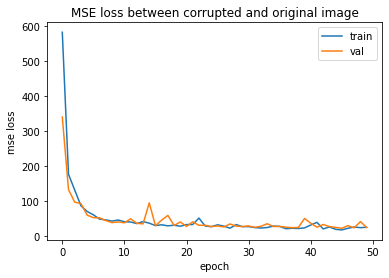

In [ ]:
plt.plot(hist10.history['loss'])
plt.plot(hist10.history['val_loss'])
plt.title('MSE loss between corrupted and original image')
plt.ylabel('mse loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

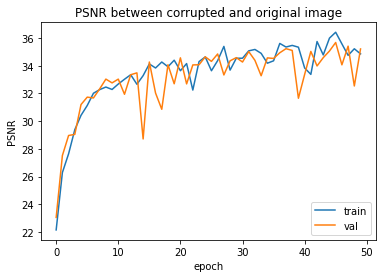

In [ ]:
plt.plot(hist10.history['PSNR'])
plt.plot(hist10.history['val_PSNR'])
plt.title('PSNR between corrupted and original image')
plt.ylabel('PSNR')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [ ]:
plt.plot(hist10_5.history['PSNR'])
plt.plot(hist10.history['PSNR'])
plt.title('PSNR between 5x5 and 3x3 filters')
plt.ylabel('PSNR')
plt.xlabel('epoch')
plt.legend(['5X5', '3X3'], loc='lower right')
plt.show()

In [31]:
test = glob.glob('/content/drive/MyDrive/FML/res12/test/*.jpg')

sum = 0
count = 1
for i in test:
  #print(count)
  count += 1
  noisy_img = cv2.imread(i)
  noisy_img = cv2.resize(noisy_img, (320, 320), interpolation = cv2.INTER_NEAREST)
  noisy_img = np.array(noisy_img).reshape((1, 320, 320, 3))
  denoised_img = rednet10.predict(noisy_img)
  img_name = i.split('/')[-1]
  original_img = cv2.imread('/content/drive/MyDrive/FML/test/' + img_name)
  original_img = cv2.resize(original_img, (320, 320), interpolation = cv2.INTER_NEAREST)
  sum += PSNR(denoised_img, original_img)

print('Average PSNR value of test set (REDNet-10) :', sum/len(test))


Average PSNR value of test set (REDNet-10) : tf.Tensor(31.327679, shape=(), dtype=float32)


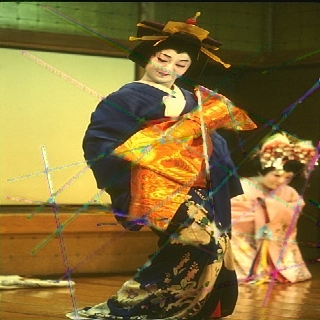

In [30]:
img = cv2.imread('/content/drive/MyDrive/FML/res12/test/65084.jpg')
img = np.array(img)
n = cv2.resize(img, (320, 320), interpolation = cv2.INTER_NEAREST)
n = n.reshape((1, 320, 320, 3))
t = rednet10.predict(n)
t = t.reshape((320, 320, 3))
from google.colab.patches import cv2_imshow
cv2_imshow(t)

In [ ]:
hist20 = rednet20.fit(x_train, y_train, epochs = 50, batch_size = 1, verbose = 1, validation_data = (x_val, y_val))
np.save('rednet20-50-64_history.npy',hist20.history)
rednet20.save('rednet10-64-50')

In [ ]:
plt.plot(hist20.history['loss'])
plt.plot(hist20.history['val_loss'])
plt.title('MSE loss between corrupted and original image')
plt.ylabel('mse loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
plt.plot(hist20.history['PSNR'])
plt.plot(hist20.history['val_PSNR'])
plt.title('PSNR between corrupted and original image')
plt.ylabel('PSNR')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [ ]:
test = glob.glob('/content/drive/MyDrive/FML/res_char/test/*.jpg')

sum = 0
count = 1
for i in test:
  #print(count)
  count += 1
  noisy_img = cv2.imread(i)
  noisy_img = cv2.resize(noisy_img, (320, 320), interpolation = cv2.INTER_NEAREST)
  noisy_img = np.array(noisy_img).reshape((1, 320, 320, 3))
  denoised_img = rednet20.predict(noisy_img)
  img_name = i.split('/')[-1]
  original_img = cv2.imread('/content/drive/MyDrive/FML/test/' + img_name)
  original_img = cv2.resize(original_img, (320, 320), interpolation = cv2.INTER_NEAREST)
  sum += PSNR(denoised_img, original_img)

print('Average PSNR value of test set (REDNet-20) :', sum/len(test))

In [ ]:
x = glob.glob('/content/drive/MyDrive/FML/res_scrib/train/*.jpg') 
val = glob.glob('/content/drive/MyDrive/FML/res_scrib/val/*.jpg')

# Creating training dataset with image size 320x320
x_train = np.zeros((len(x), 320, 320, 3))
y_train = np.zeros((len(x), 320, 320, 3))
count = 0
for i in x:
  img1 = cv2.imread(i)
  img1_name = i.split('/')[-1]
  img2 = cv2.imread('/content/drive/MyDrive/FML/train/' + img1_name)
  img1 = cv2.resize(img1, (320, 320), interpolation = cv2.INTER_NEAREST)
  img2 = cv2.resize(img2, (320, 320), interpolation = cv2.INTER_NEAREST)
  x_train[count] = img1
  y_train[count] = img2
  count += 1

# Creating validation set with image size 320x320
x_val = np.zeros((len(val), 320, 320, 3))
y_val = np.zeros((len(val), 320, 320, 3))
count = 0
for i in val:
  img1 = cv2.imread(i)
  img1_name = i.split('/')[-1]
  img2 = cv2.imread('/content/drive/MyDrive/FML/val/' + img1_name)
  img1 = cv2.resize(img1, (320, 320), interpolation = cv2.INTER_NEAREST)
  img2 = cv2.resize(img2, (320, 320), interpolation = cv2.INTER_NEAREST)
  x_val[count] = img1
  y_val[count] = img2
  count += 1

In [ ]:
sc_hist10 = rednet10.fit(x_train, y_train, epochs = 50, batch_size = 1, verbose = 1, validation_data = (x_val, y_val))
np.save('sc_rednet10-50-64_history.npy',sc_hist10.history)
#rednet10.save('rednet10-64-50')

In [ ]:
plt.plot(hist10.history['loss'])
plt.plot(hist10.history['val_loss'])
plt.title('MSE loss between corrupted and original image')
plt.ylabel('mse loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()